<a href="https://colab.research.google.com/github/sedavasema/mohammad/blob/main/DBSCAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt

یاد گرفتن تولید اعداد تصادفی

In [52]:
arr = np.array([[[1, 2, 3], [4, 5, 6]], [[1, 2, 3], [4, 5, 6]]])

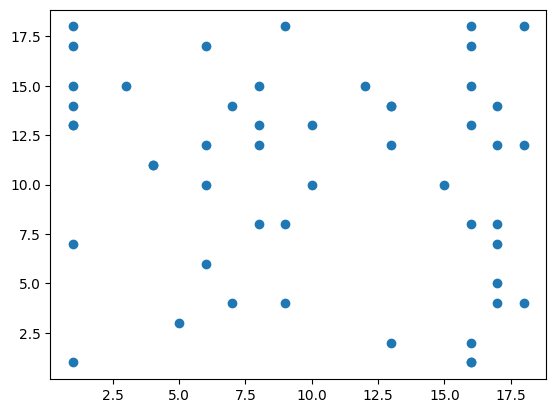

In [126]:
from random import seed,random,randint
seed(1)#دانه دادن برای تولید اعداد رندوم که هر بار یک عدد رندم تولید کند 
x=np.zeros((50,2),dtype='int')
# generate random numbers between 0-1
for i in range(50):
   #value = random()#اعداد تصادفی بین صفر و یک با توزیع نرمال
   for j in range(2):
    value = randint(1,18)#تولید اعداد تصادفی صحیح بین استارت و استوپ
    x[i,j]+=value
   #print(x[i])
plt.scatter(x[:,0],x[:,1])

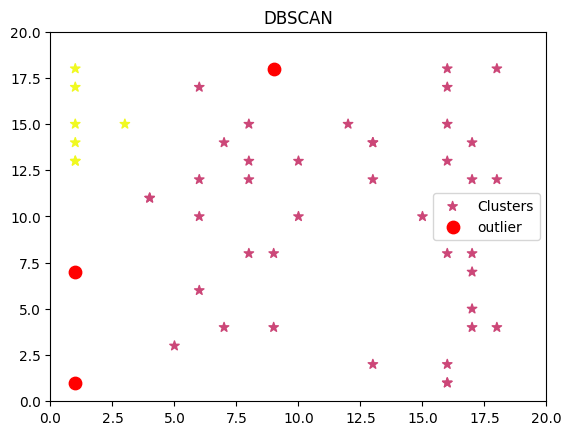

[ 0  0  0  0  0  0  0  1  0  0 -1  1  1  0  1  0  0  0  0  0  1  0  0  0
  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0 -1  0  0  0  0 -1
  1  0]


In [127]:
# Create dataset
#X = np.array([[1, 2], [2, 2], [2, 3], [8, 7], [8, 8], [25, 80]])
from sklearn.cluster import DBSCAN
# Compute DBSCAN
db = DBSCAN(eps=3, min_samples=3).fit(x)

plt.xlim(0,20)
plt.ylim(0,20)
plt.scatter(x[:,0],x[:,1],marker='*',c=db.labels_,cmap='plasma',s=50)

outlier_index = [np.where(db.labels_ == -1)[0]]
for i in outlier_index:
  plt.scatter(x[i,0],x[i,1],marker='o',c='red',s=80)

plt.legend(['Clusters','outlier'])
plt.title('DBSCAN')
plt.show()
# Print labels (-1 means outlier)
print(db.labels_)

In [132]:
X.shape
x

array([[ 5,  3],
       [ 9,  4],
       [16, 15],
       [16, 13],
       [ 7,  4],
       [16,  1],
       [13, 14],
       [ 1, 15],
       [ 9,  8],
       [ 4, 11],
       [ 1,  1],
       [ 1, 18],
       [ 1, 13],
       [ 7, 14],
       [ 1, 17],
       [ 8, 15],
       [16, 18],
       [ 8, 12],
       [ 8,  8],
       [15, 10],
       [ 1, 14],
       [18,  4],
       [ 6, 10],
       [ 4, 11],
       [17, 14],
       [17,  7],
       [10, 10],
       [16, 17],
       [13,  2],
       [16,  8],
       [13, 14],
       [ 6, 12],
       [18, 12],
       [ 3, 15],
       [17,  4],
       [ 6, 17],
       [13, 12],
       [16,  1],
       [16,  2],
       [10, 13],
       [ 6,  6],
       [17,  8],
       [ 1,  7],
       [18, 18],
       [ 8, 13],
       [17, 12],
       [12, 15],
       [ 9, 18],
       [ 1, 13],
       [17,  5]])